### Notebook imports and Packages

In [114]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Example 1 - A simple Cost Function
### $$f(x) = x^2 + x + 1$$

In [115]:
def f(x):
    return x**2 + x + 1

In [116]:
#using np to generate x_1 value
#generate 100 value from -3 to 3 with equal spacing
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

<function matplotlib.pyplot.show(close=None, block=None)>

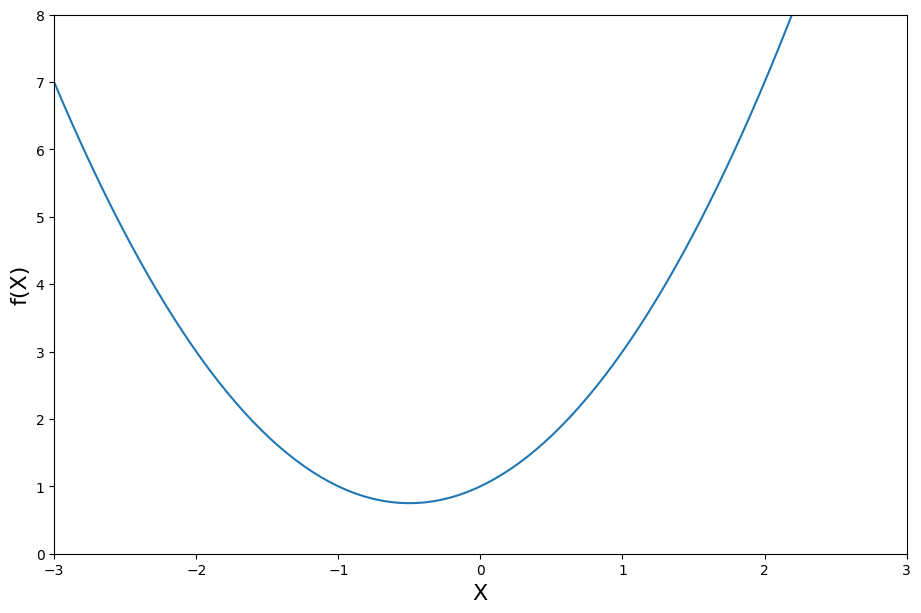

In [117]:
plt.figure(figsize = (11,7))
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1))
plt.show

### Slope and Derivatives
Create a python function for the derivative of f(x) called df(x)

In [118]:
def df(x):
    return 2*x + 1

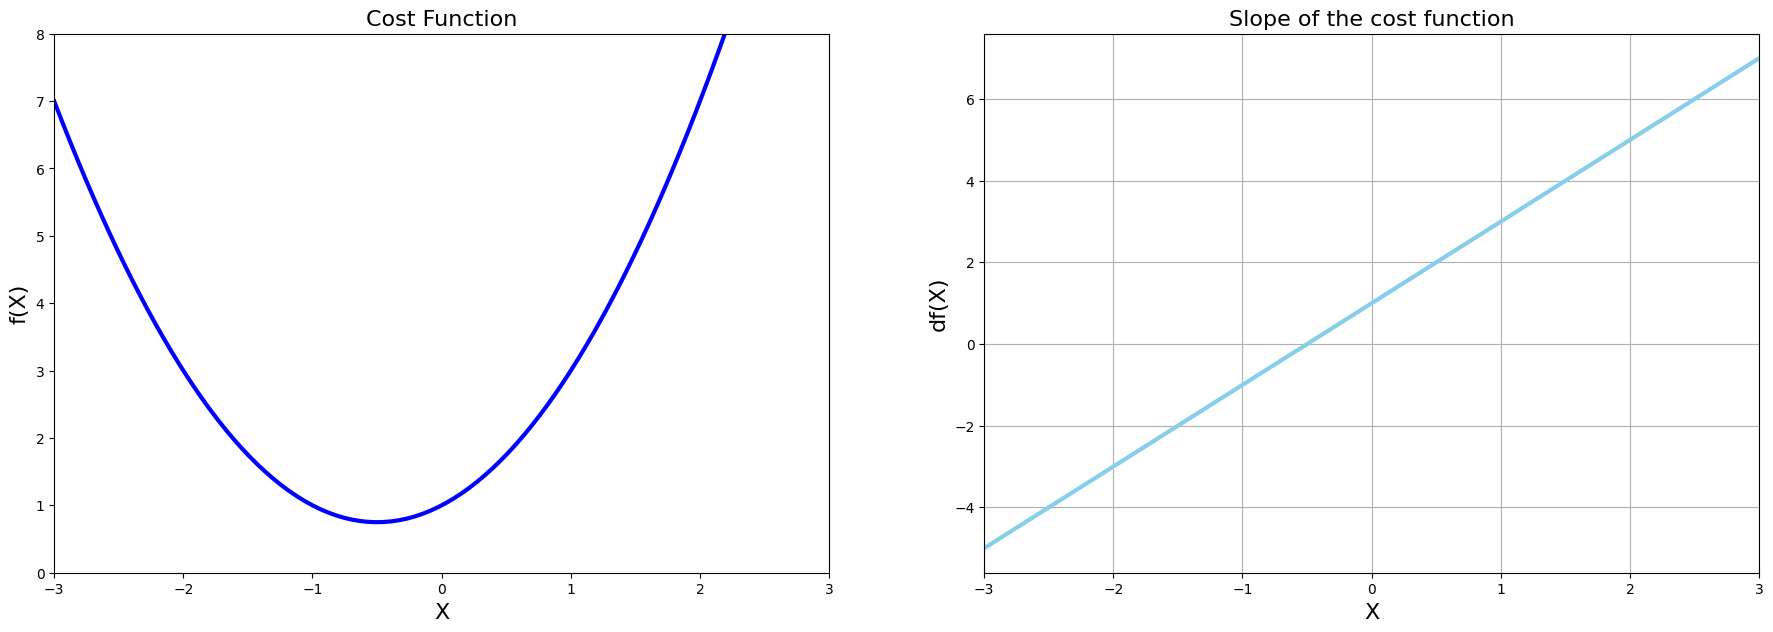

In [119]:
plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-3,3)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3)

plt.show()

### Python Loops and Gradient Descent

In [120]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
iteration = 0

x_list = [new_x]
slope_list = [df(new_x)]

print(type(x_list))

while True: 
    previous_x = new_x
    gradient = df(previous_x) # calculating slope
    new_x = previous_x - step_multiplier * gradient # Updating X value

    step_size = abs(new_x - previous_x)
    #print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('number of iterations: ', iteration)
        break

    iteration = iteration + 1

print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is', f(new_x))

<class 'list'>
number of iterations:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is 0.7500000015970362


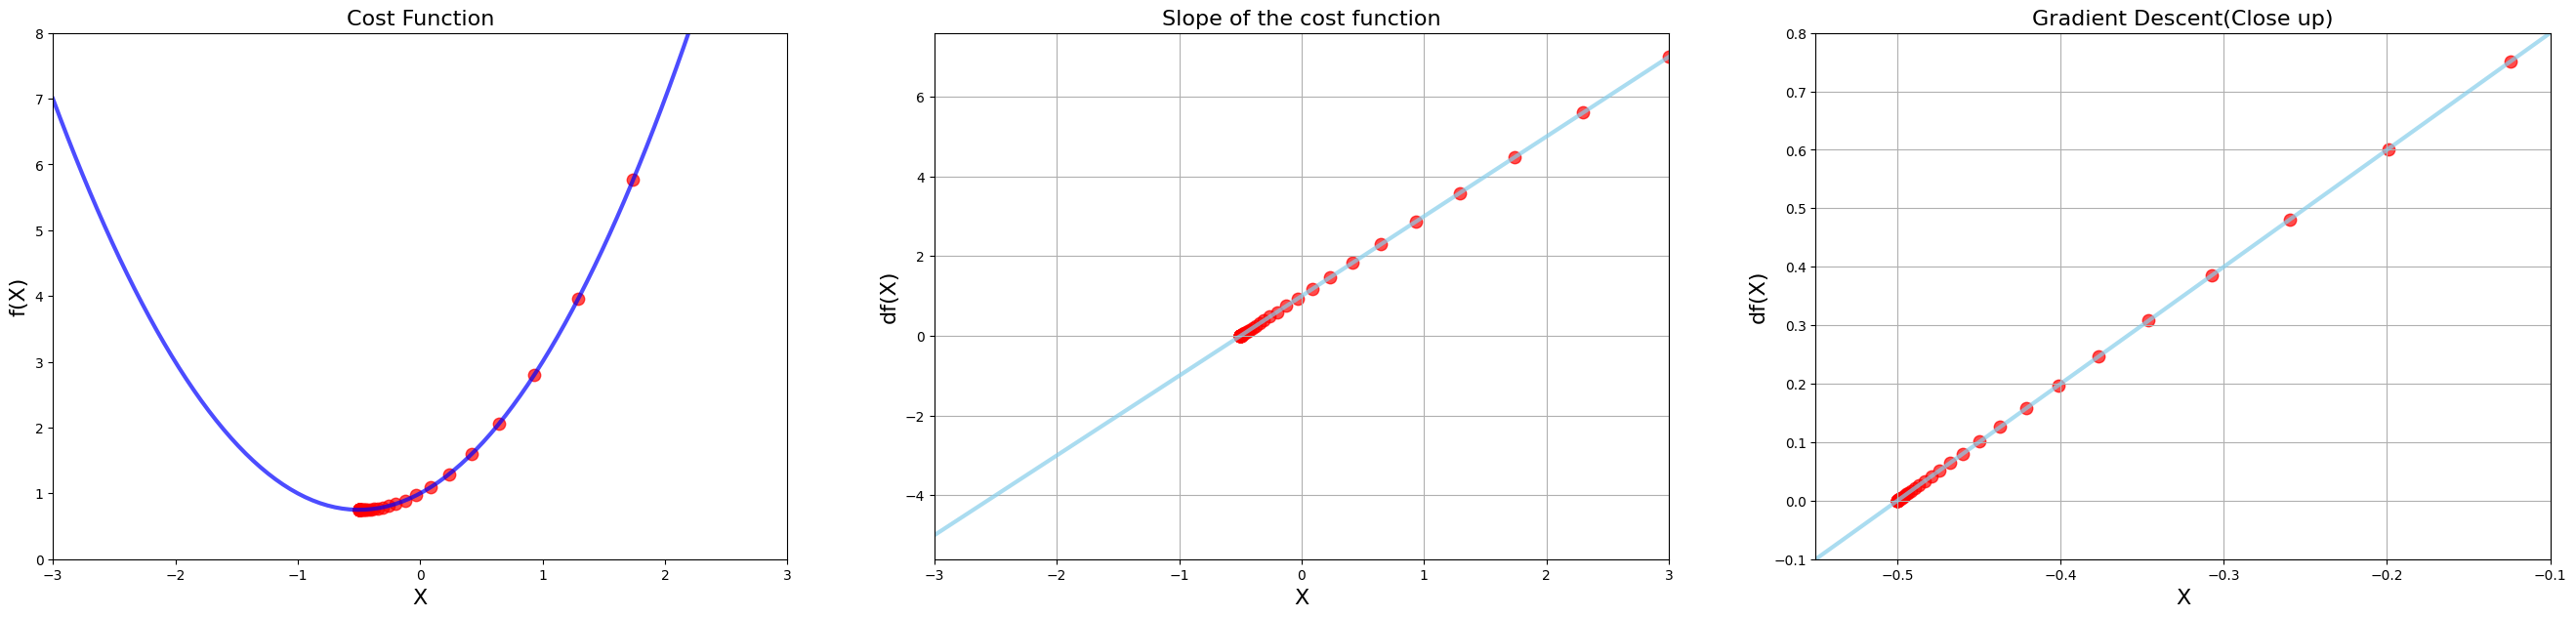

In [121]:
# Superimpose重叠 the gradient descent calculations on plot

plt.figure(figsize=(33,7))

# 1 Chart: Cost Function
plt.subplot(1,3,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(X)', fontsize = 16)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3, alpha = 0.7)

# 1 Chart: Superimpose
gradient_x_list = np.array(x_list) # list can not perform **(power) operation, so conversion is required
plt.scatter(x_list,f(gradient_x_list), color = 'red', s = 80, alpha= 0.7)

# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-3,3)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3, alpha = 0.7)

# 2 Chart: Superimpose
plt.scatter(x_list, slope_list, color = 'red', s = 80, alpha= 0.7)

# 3 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent(Close up)', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(X)', fontsize = 16)
plt.xlim(-0.55 , -0.1) 
plt.ylim(-0.1 , 0.8)
plt.grid()
plt.plot(x_1,df(x_1), color ='skyblue', linewidth = 3, alpha = 0.7)

# 3 Chart: Superimpose
plt.scatter(x_list, slope_list, color = 'red', s = 80, alpha= 0.7)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess and Advanced Functions
### $$g(x) = x^4 - x^2 + 5$$

In [123]:
# Generating some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

In [125]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

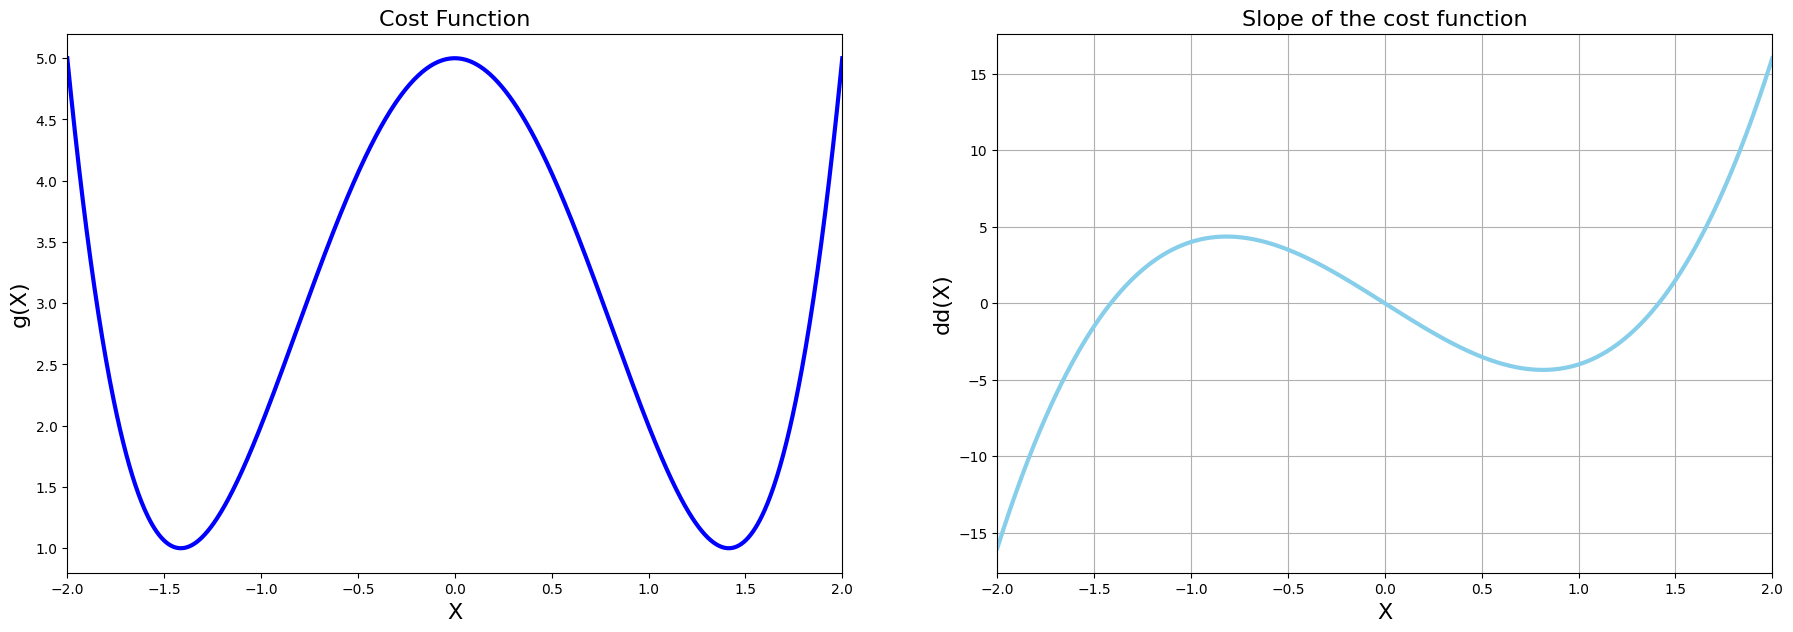

In [130]:
plt.figure(figsize=(22,7))

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize = 16)
plt.xlim(-2,2)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 16)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dd(X)', fontsize = 16)
plt.xlim(-2,2)
plt.grid()
plt.plot(x_2,dg(x_2), color ='skyblue', linewidth = 3)

plt.show()

### Gradient Descent as a Python Function

In [152]:
def gradient_descent(derivative_func, initial_guess, learning_rate = 0.02, precision = 0.001):
    new_x = initial_guess
    multiplier = learning_rate

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    while True: 
        previous_x = new_x
        gradient = derivative_func(previous_x) # calculating slope
        new_x = previous_x - multiplier * gradient # Updating X value
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [155]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, learning_rate=0.01, precision=0.0001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(list_x))

Local min occurs at: 1.4137636556157256
Number of iterations: 56


In [154]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, learning_rate=0.02, precision=0.001)

print('Local min occurs at:', local_min)
print('Number of iterations:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of iterations: 23
